# **Standardisation with Sklearn**
In this procidure we calculate, **z = (x - mean) / std**. \\
Standardisation:

*   Centers the mean at 0
*   Scale the variance at 1
*   Presarve the shape of the original distribution. 
*   The minimum and maximum values of the different variables may vary.
*   Preserve outliers.


Good for algorithms that requires features centered at zero.


In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Weapon for standardisation 
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Boston House price dataset
data = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)

# Target variable 
data['MEDV'] = load_boston().target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Separate data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis = 1), data.MEDV, test_size = .30, random_state = 333)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [4]:
# Set up the weapon 
scaler = StandardScaler()

# Fit the scaler with the train set.
scaler.fit(X_train)

# Transform Train and Test Set 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Let's the the mean values of train set after standerdization 
print(scaler.mean_)

print('---------------------------------------------------------------')

# Let's the the standerd deviation of test set after standerdization
print(scaler.scale_)


[3.78267432e+00 1.10903955e+01 1.13076554e+01 6.21468927e-02
 5.56861582e-01 6.28834181e+00 6.97827684e+01 3.74003475e+00
 9.90112994e+00 4.14389831e+02 1.85341808e+01 3.59848672e+02
 1.26473729e+01]
---------------------------------------------------------------
[8.78124091e+00 2.25729581e+01 6.90773957e+00 2.41422154e-01
 1.14792088e-01 7.05513824e-01 2.82876161e+01 2.08546291e+00
 8.84670764e+00 1.70870554e+02 2.12294195e+00 8.81715636e+01
 6.96542629e+00]


In [0]:
# Represents the results in DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [6]:
# Take a look of before and after statistical significancies:
print(np.round(X_train.describe()), 1)
print('----------------------------------------------------------------------------------------------')
print(np.round(X_train_scaled.describe()), 1)

        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0    354.0  354.0  354.0
mean     4.0   11.0   11.0    0.0    1.0  ...   10.0  414.0     19.0  360.0   13.0
std      9.0   23.0    7.0    0.0    0.0  ...    9.0  171.0      2.0   88.0    7.0
min      0.0    0.0    0.0    0.0    0.0  ...    1.0  188.0     13.0    3.0    2.0
25%      0.0    0.0    5.0    0.0    0.0  ...    4.0  280.0     17.0  377.0    7.0
50%      0.0    0.0   10.0    0.0    1.0  ...    5.0  330.0     19.0  392.0   12.0
75%      4.0   12.0   18.0    0.0    1.0  ...   24.0  666.0     20.0  397.0   17.0
max     89.0  100.0   28.0    1.0    1.0  ...   24.0  711.0     22.0  397.0   38.0

[8 rows x 13 columns] 1
----------------------------------------------------------------------------------------------
        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354

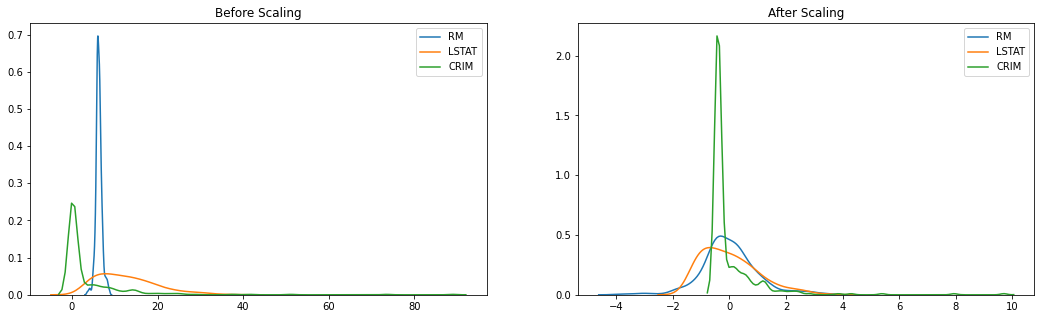

In [7]:
# Visulize the distributions of  before and after standerdization:
fig, (ax1,ax2) = plt.subplots( 1, 2, figsize = (18, 5))

# Before Scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax = ax1)
sns.kdeplot(X_train['LSTAT'], ax = ax1)
sns.kdeplot(X_train['CRIM'], ax = ax1)

# After Scaling 
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['RM'], ax = ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax = ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax = ax2)

plt.show()

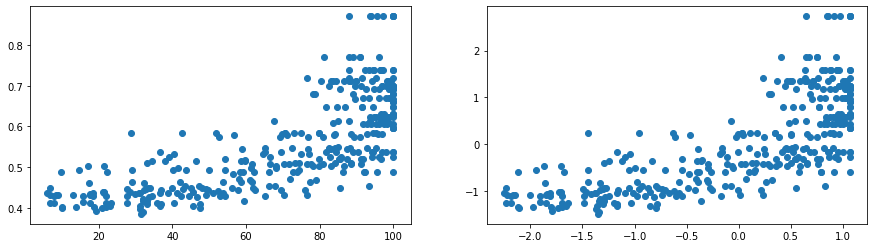

In [8]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize = (15, 4))
ax1.scatter(X_train.AGE, X_train.NOX)
ax2.scatter(X_train_scaled.AGE, X_train_scaled.NOX)

# **Mean Normalisation with pandas**
In this procedure we calculate: **x_scaled = (x - x_mean) / (x_max - x_min)**. \\
Mean Normalisation:

*   centers the mean at 0
*   variance will be different
*   may alter the shape of the original distribution
*   the minimum and maximum value squeezed between -1 and 1
*   preserves outliers.

Good for algorithms that requires features centered at zero.




In [9]:
# Let's learn the mean from the train set
means = X_train.mean(axis = 0)
means

CRIM         3.782674
ZN          11.090395
INDUS       11.307655
CHAS         0.062147
NOX          0.556862
RM           6.288342
AGE         69.782768
DIS          3.740035
RAD          9.901130
TAX        414.389831
PTRATIO     18.534181
B          359.848672
LSTAT       12.647373
dtype: float64

In [10]:
# Min and max values and the value range from the train set
ranges = X_train.max(axis = 0) - X_train.min(axis = 0)
ranges

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.16400
AGE         94.00000
DIS          9.58070
RAD         23.00000
TAX        523.00000
PTRATIO      9.40000
B          394.38000
LSTAT       36.05000
dtype: float64

In [13]:
# Perform mean normalization:
X_train_mean = (X_train - means) / ranges 
X_test_mean = (X_test - means) / ranges 

print(np.round(X_train.describe()), 1)
print('----------------------------------------------------------------------------------')
print(np.round(X_train_mean.describe()), 1)

        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0    354.0  354.0  354.0
mean     4.0   11.0   11.0    0.0    1.0  ...   10.0  414.0     19.0  360.0   13.0
std      9.0   23.0    7.0    0.0    0.0  ...    9.0  171.0      2.0   88.0    7.0
min      0.0    0.0    0.0    0.0    0.0  ...    1.0  188.0     13.0    3.0    2.0
25%      0.0    0.0    5.0    0.0    0.0  ...    4.0  280.0     17.0  377.0    7.0
50%      0.0    0.0   10.0    0.0    1.0  ...    5.0  330.0     19.0  392.0   12.0
75%      4.0   12.0   18.0    0.0    1.0  ...   24.0  666.0     20.0  397.0   17.0
max     89.0  100.0   28.0    1.0    1.0  ...   24.0  711.0     22.0  397.0   38.0

[8 rows x 13 columns] 1
----------------------------------------------------------------------------------
        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0   

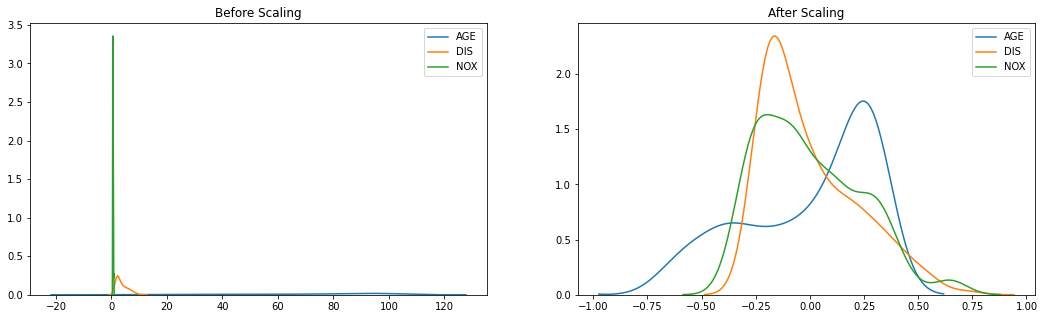

In [14]:
# Visulize the distributions of  before and after mean normalisation:
fig, (ax1,ax2) = plt.subplots( 1, 2, figsize = (18, 5))

# Before Scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax = ax1)
sns.kdeplot(X_train['DIS'], ax = ax1)
sns.kdeplot(X_train['NOX'], ax = ax1)

# After Scaling 
ax2.set_title('After Scaling')
sns.kdeplot(X_train_mean['AGE'], ax = ax2)
sns.kdeplot(X_train_mean['DIS'], ax = ax2)
sns.kdeplot(X_train_mean['NOX'], ax = ax2)

plt.show()

# **MinMax Scaling with Sklearn**
In this procedure we calculate: **x_scaled = (x - x_min) / (x_max - x_min)**. \\
MinMax Scaling:

*   does not centers the mean at 0
*   variance varies across variables
*   may not preserve the shape of the original distribution
*   the minimum and maximum values are 0 and 1
*   sensitive outliers.

In [17]:
from sklearn.preprocessing import MinMaxScaler
# Set up the scaler
scaler_minmax = MinMaxScaler()

# Fit the scaler to the train set.
scaler_minmax.fit(X_train)

# Transform train and test sets
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Maximum values of the features, learned form train set
print(scaler_minmax.data_max_)
print('---------------------------------------------------------------')
print(scaler_minmax.min_)
print('---------------------------------------------------------------')
print(scaler_minmax.data_range_)

[ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]
---------------------------------------------------------------
[-7.10352762e-05  0.00000000e+00 -1.68621701e-02  0.00000000e+00
 -7.92181070e-01 -6.89581720e-01 -6.38297872e-02 -1.17903702e-01
 -4.34782609e-02 -3.59464627e-01 -1.34042553e+00 -6.38977636e-03
 -5.32593620e-02]
---------------------------------------------------------------
[8.896988e+01 1.000000e+02 2.728000e+01 1.000000e+00 4.860000e-01
 5.164000e+00 9.400000e+01 9.580700e+00 2.300000e+01 5.230000e+02
 9.400000e+00 3.943800e+02 3.605000e+01]


In [18]:
# Transformed the returned NumPy array to dataframe
X_train_minmax = pd.DataFrame(X_train_minmax, columns = X_train.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns = X_test.columns)

print(np.round(X_train.describe()), 1)
print('----------------------------------------------------------------------------------')
print(np.round(X_train_minmax.describe()), 1)

        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0    354.0  354.0  354.0
mean     4.0   11.0   11.0    0.0    1.0  ...   10.0  414.0     19.0  360.0   13.0
std      9.0   23.0    7.0    0.0    0.0  ...    9.0  171.0      2.0   88.0    7.0
min      0.0    0.0    0.0    0.0    0.0  ...    1.0  188.0     13.0    3.0    2.0
25%      0.0    0.0    5.0    0.0    0.0  ...    4.0  280.0     17.0  377.0    7.0
50%      0.0    0.0   10.0    0.0    1.0  ...    5.0  330.0     19.0  392.0   12.0
75%      4.0   12.0   18.0    0.0    1.0  ...   24.0  666.0     20.0  397.0   17.0
max     89.0  100.0   28.0    1.0    1.0  ...   24.0  711.0     22.0  397.0   38.0

[8 rows x 13 columns] 1
----------------------------------------------------------------------------------
        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0   

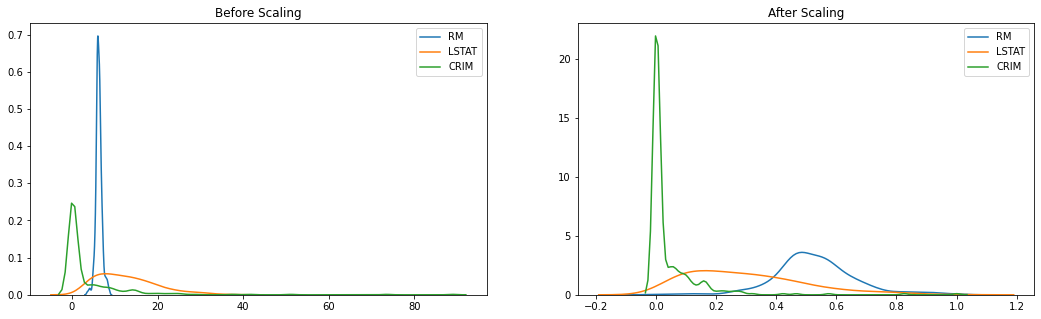

In [19]:
# Visulize the distributions of  before and after min-max Scaling:
fig, (ax1,ax2) = plt.subplots( 1, 2, figsize = (18, 5))

# Before Scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax = ax1)
sns.kdeplot(X_train['LSTAT'], ax = ax1)
sns.kdeplot(X_train['CRIM'], ax = ax1)

# After Scaling 
ax2.set_title('After Scaling')
sns.kdeplot(X_train_minmax['RM'], ax = ax2)
sns.kdeplot(X_train_minmax['LSTAT'], ax = ax2)
sns.kdeplot(X_train_minmax['CRIM'], ax = ax2)

plt.show()